# Hyperspectral - Mineral Map Feature Extraction


Hyperspectral mineral map datastore and feature extraction.

N.C. Howes   
December 2021

## Configure

In [1]:
import sys,os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
sys.path.append("..")

#For development 
%reload_ext autoreload
%autoreload 2

In [2]:
from digitalcore import MineralMap

In [3]:
# Input paths 
path_to_data    = "../data/cmm-111C-coremask-mineralmap/"
path_to_mineral = os.path.join(path_to_data, "borehole-mineral-map")
path_to_mask    = os.path.join(path_to_data, "core-mask")

# Output path
fullpath_to_product = "../data/data-products/mineral-map-features-cmm11.csv"

# Workflow

## Read mineral map datastore

Read the mineral map and core mask datastore into Hyperspectral datastore object. This object extracts core mineral composition [%] from the TerraCore mineral map images and converts these data into a tubular format for machine learning. There are methods to visualize the data at the core box and full-core scale. 

In [4]:
ds = MineralMap.read_ds(path_to_mineral, path_to_mask, mode="all")

Preview datastore metadata 

In [5]:
ds.metadata

,core-id,depth-start,depth-end,mineral_filename,mask_filename
box-id,,,,,
1,111,0.0,10.00000,Borehole_Mineral_MAP__VN-SWIR__CMM-111_1@0_10.png,Core_Mask__VN-SWIR__CMM-111_1@0_10.png
2,111,10.0,19.50000,Borehole_Mineral_MAP__VN-SWIR__CMM-111_2@10_19...,Core_Mask__VN-SWIR__CMM-111_2@10_19.5.png
3,111,19.5,28.50000,Borehole_Mineral_MAP__VN-SWIR__CMM-111_3@19.5_...,Core_Mask__VN-SWIR__CMM-111_3@19.5_28.5.png
4,111,28.5,37.50000,Borehole_Mineral_MAP__VN-SWIR__CMM-111_4@28.5_...,Core_Mask__VN-SWIR__CMM-111_4@28.5_37.5.png
5,111,37.5,47.50000,Borehole_Mineral_MAP__VN-SWIR__CMM-111_5@37.5_...,Core_Mask__VN-SWIR__CMM-111_5@37.5_47.5.png
6,111,47.5,56.00000,Borehole_Mineral_MAP__VN-SWIR__CMM-111_6@47.5_...,Core_Mask__VN-SWIR__CMM-111_6@47.5_56.png
7,111,56.0,67.00000,Borehole_Mineral_MAP__VN-SWIR__CMM-111_7@56_67...,Core_Mask__VN-SWIR__CMM-111_7@56_67.png
8,111,67.0,75.00000,Borehole_Mineral_MAP__VN-SWIR__CMM-111_8@67_75...,Core_Mask__VN-SWIR__CMM-111_8@67_75.png
9,111,75.0,86.00000,Borehole_Mineral_MAP__VN-SWIR__CMM-111_9@75_86...,Core_Mask__VN-SWIR__CMM-111_9@75_86.png


Number of core boxes in datastore

In [6]:
len(ds.minerals)

238

Preview core boxes by box-id.

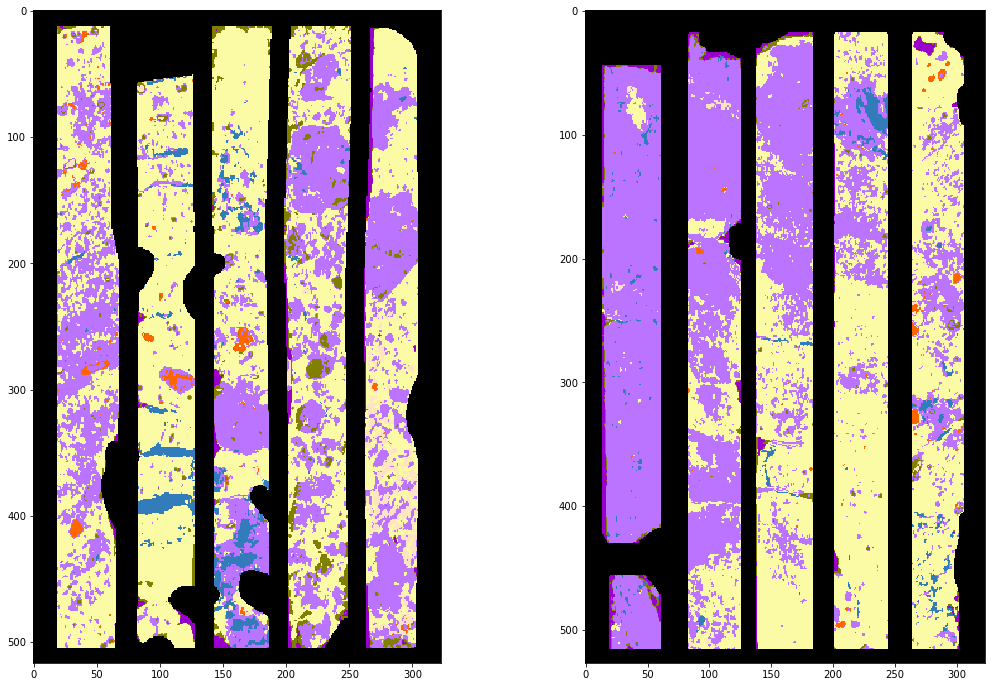

In [7]:
ds.plot_core_box( box_id=[0,1]) 

## Extract features 


In [8]:
ds.run_feature_extraction()

The mineral features are percentage occurrences per depth. There is a corresponding box id. 

In [9]:
ds.core_df.loc[1].iloc[10:20]

,core_depth,illite,illite-smectite,low-reflectance,montmorillonite,other,smectite-kaolinite,smectite-saponite
box-id,,,,,,,,
1,0.038700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.042570,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.046440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.050310,0.000000,0.523810,0.071429,0.023810,0.0,0.000000,0.380952
1,0.054180,0.000000,0.595238,0.071429,0.023810,0.0,0.000000,0.309524
1,0.058050,0.000000,0.738095,0.000000,0.047619,0.0,0.000000,0.214286
1,0.061920,0.000000,0.714286,0.000000,0.047619,0.0,0.095238,0.142857
1,0.065789,0.095238,0.500000,0.000000,0.214286,0.0,0.047619,0.142857
1,0.069659,0.119048,0.476190,0.000000,0.190476,0.0,0.023810,0.190476


List of features

In [10]:
ds.features 

['illite',
 'illite-smectite',
 'low-reflectance',
 'montmorillonite',
 'other',
 'smectite-kaolinite',
 'smectite-saponite']

Convert the core box images into a core column.

In [11]:
ds.run_corecolumn()

Calculate cumulative composition for the mineral assemblage.

In [12]:
ds.run_composition()

## Visualize

### Full Core

Plot of the full length core mineral assemblage with: core minimap, cumulative composition, and percent occurrence for each mineral type.   

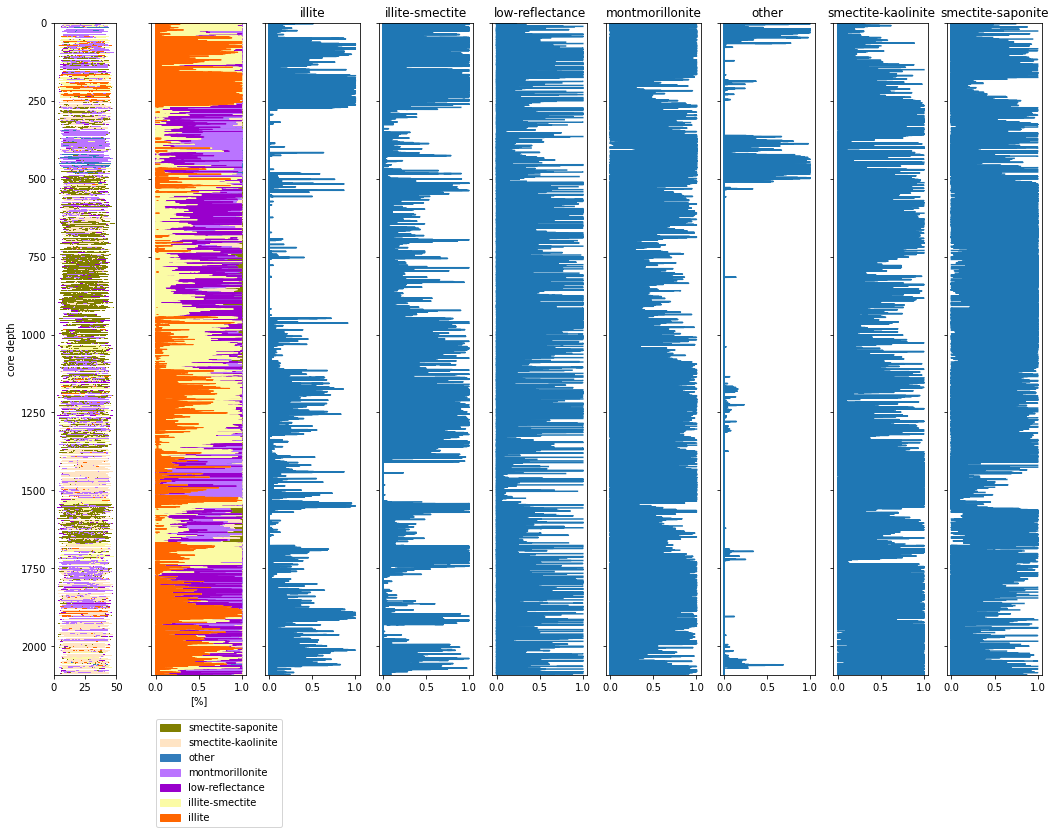

In [13]:
ax = ds.plot_core_features(minimap=True, comp=True)

Customize the plot by specifying whether to include the minimap or composition. 

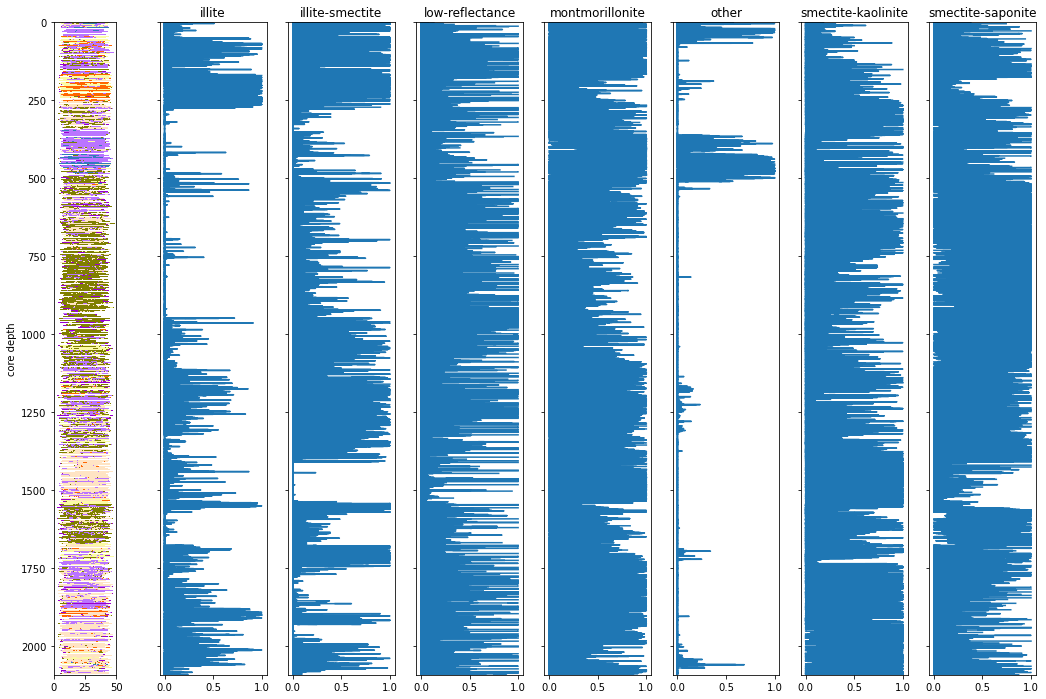

In [14]:
ax = ds.plot_core_features(minimap=True, comp=False)

### Core box

Specify core box id(s) to view specific sections of the core.  

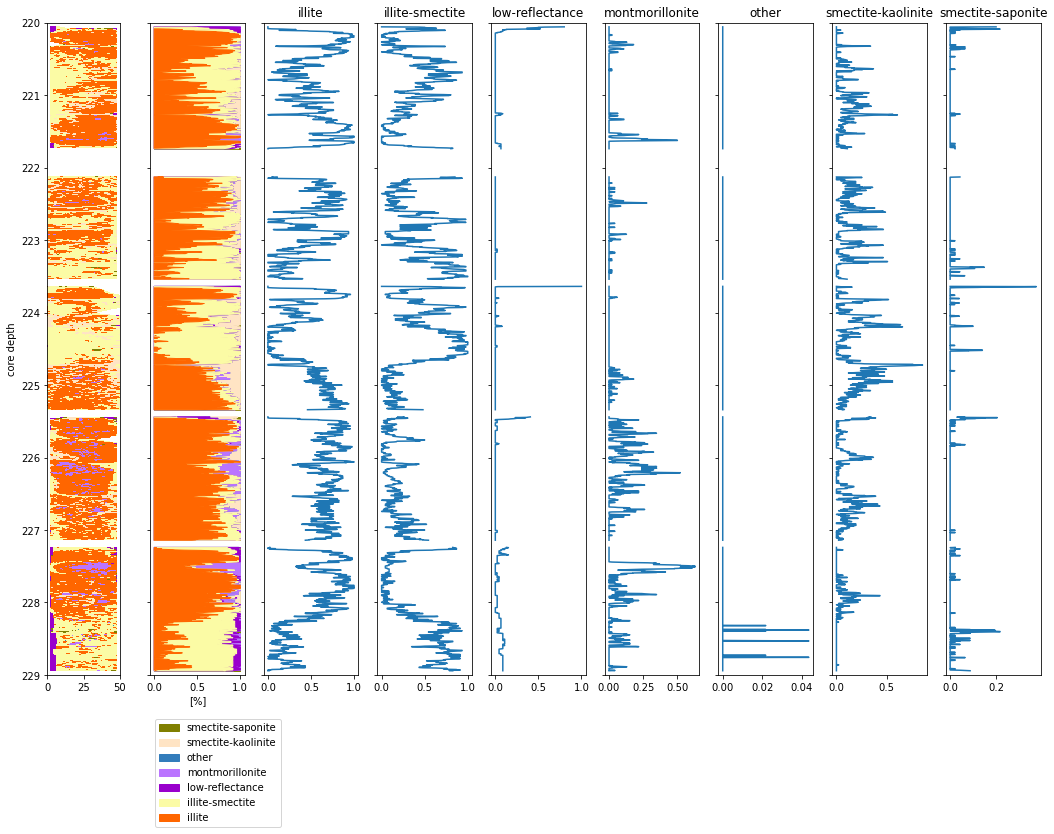

In [15]:
ax = ds.plot_core_box_features( box_id=[25], minimap=True, comp=True )

A second core box.

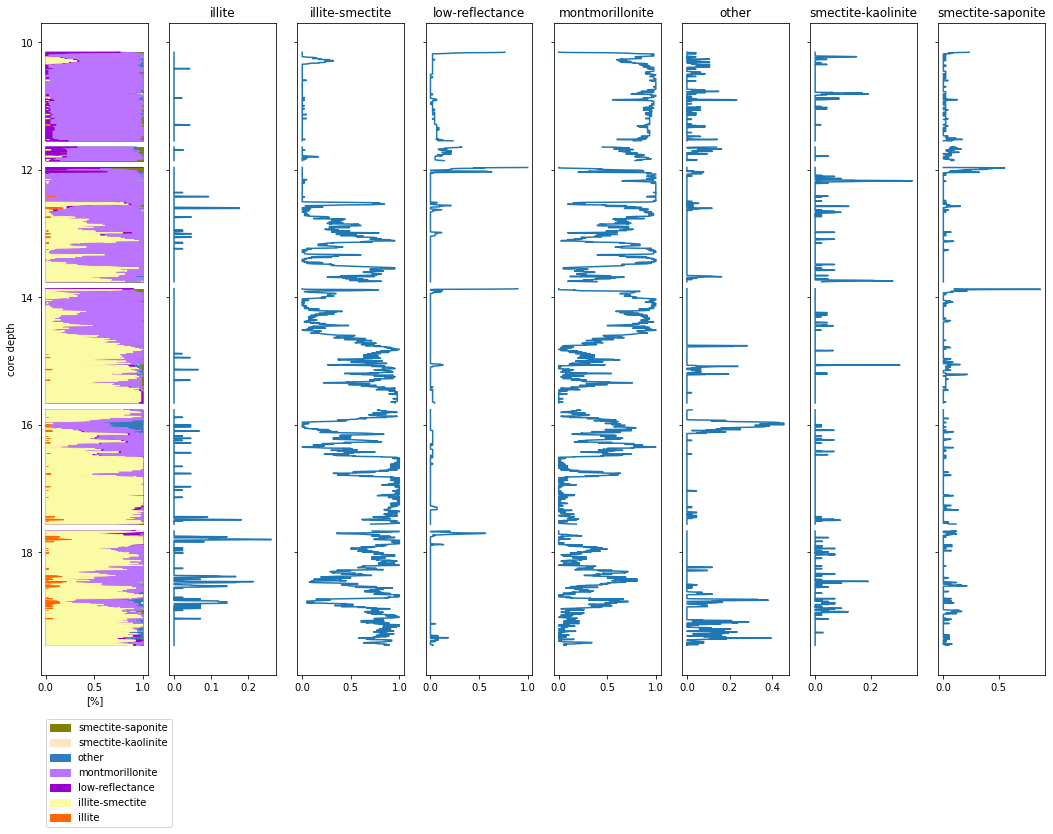

In [16]:
ax = ds.plot_core_box_features( box_id=[2], minimap=False, comp=True )

Specify a range of core box id. 

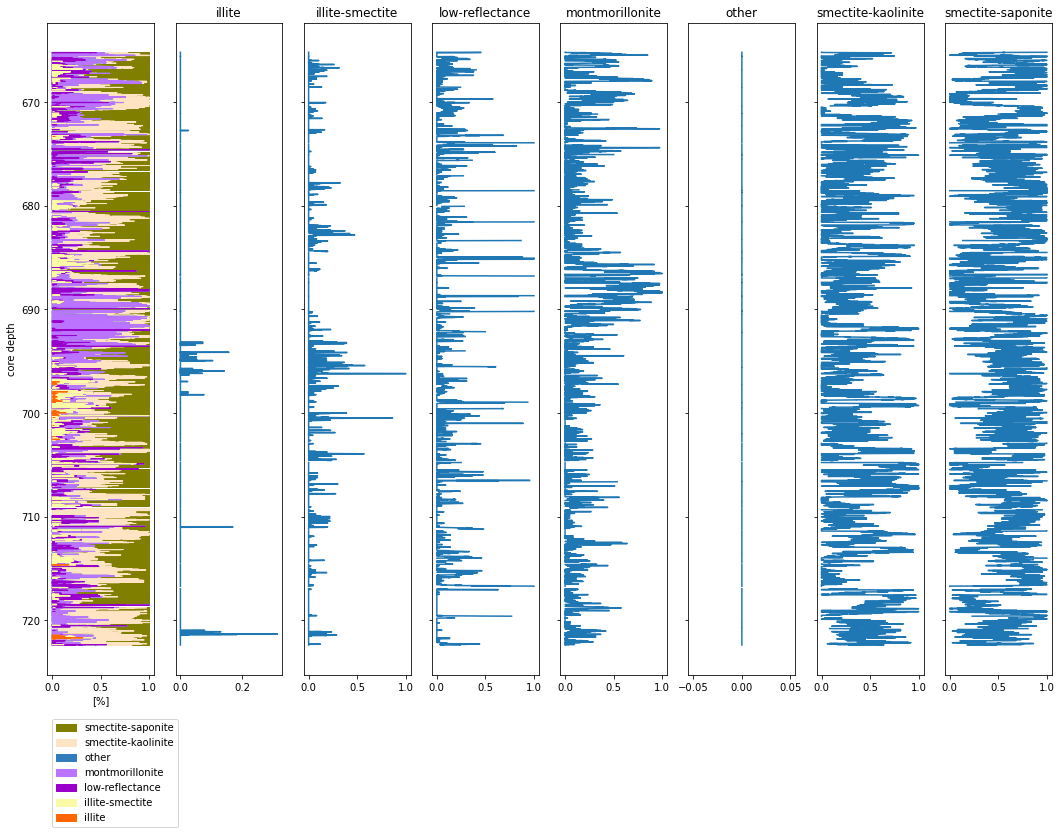

In [17]:
ax = ds.plot_core_box_features( box_id=range(75,81), minimap=False, comp=True )

Mineral Map Legend 

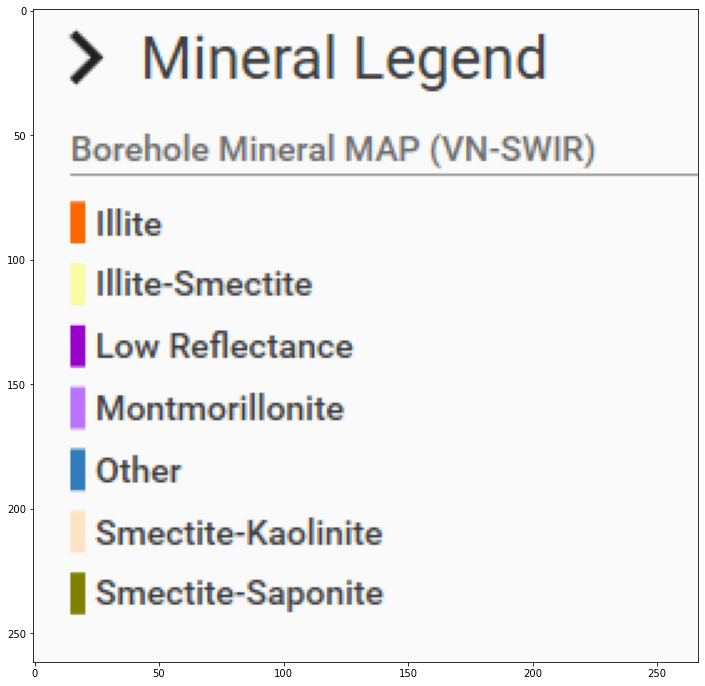

In [18]:
legend = np.array( 
    Image.open( os.path.join(path_to_data, "mineral-legend.png") ) 
    )
fig, ax  = plt.subplots(1,1, figsize=(18,12))
ax.imshow(legend)

## Export 

Export the tabular mineral features to data products directory.

In [19]:
ds.to_csv( fullpath_to_product )